In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("housing.csv")

In [8]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']

In [9]:
#standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],))  # Output layer with 1 neuron for linear regression
])

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
history = model.fit(X_train,y_train,epochs=100, batch_size=32,validation_split=0.1)

Epoch 1/100
11/11 [==============================] - 1s 29ms/step - loss: 239998451712.0000 - val_loss: 255237718016.0000
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 239998402560.0000 - val_loss: 255237685248.0000
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 239998402560.0000 - val_loss: 255237685248.0000
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 239998369792.0000 - val_loss: 255237652480.0000
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 239998369792.0000 - val_loss: 255237636096.0000
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 239998337024.0000 - val_loss: 255237603328.0000
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 239998337024.0000 - val_loss: 255237586944.0000
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 239998320640.0000 - val_loss: 255237586944.0000
Epoch 9/100
11/11 [============

In [18]:
#Evaluate the model on the test set
test_loss = model.evaluate(X_test,y_test)
print('Test loss:', test_loss)

4/4 [==============================] - 0s 4ms/step - loss: 202395222016.0000
Test loss: 202395222016.0


**Visualization**

In [19]:
import matplotlib.pyplot as plt

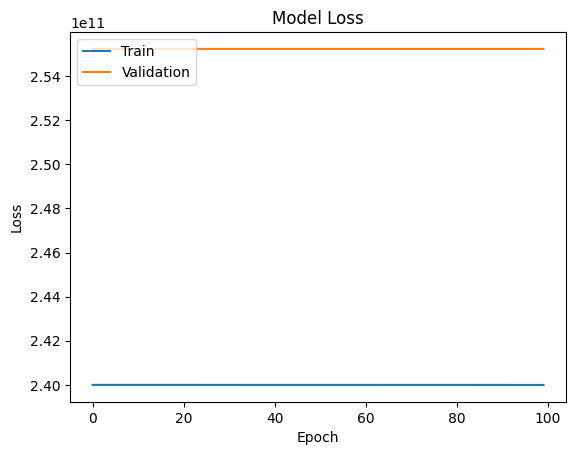

In [20]:
#plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.show()